# Homework #5: First Order Methods
|Author| Stanley A. Baronett|
|--|-------------------------------|
|Created | 6/25/2020|
|Updated | 7/2/2020|

## Required Libraries

In [1]:
using LinearAlgebra
using Plots

## Strong Backtracking Approximate Line Search (Strong Wolfe Conditions)

In [2]:
function strong_backtracking(f, ∇, x, d; α=1, β=1e-4, σ=0.1)
    y0, g0, y_prev, α_prev = f(x)[1], ∇(x)⋅d, NaN, 0
    αlo, αhi = NaN, NaN
    
    # bracket phase
    while true
        y = f(x + α*d)[1]
        if y > y0 + β*α*g0 || (!isnan(y_prev) && y ≥ y_prev)
            αlo, αhi = α_prev, α
            break
        end
        g = ∇(x + α*d)⋅d
        if abs(g) ≤ -σ*g0
            return α
        elseif g ≥ 0
            αlo, αhi = α, α_prev
            break
        end
        y_prev, α_prev, α = y, α, 2α
    end
    
    # zoom phase
    ylo = f(x + αlo*d)[1]
    while true
        α = (αlo + αhi)/2
        y = f(x + α*d)[1]
        if y > y0 + β*α*g0 || y ≥ ylo
            αhi = α
        else
            g = ∇(x + α*d)⋅d
            if abs(g) ≤ -σ*g0
                return α
            elseif g*(αhi - αlo) ≥ 0
                αhi = αlo
            end
            αlo = α
        end
    end
end

strong_backtracking (generic function with 1 method)

# Gradient Descent

In [3]:
abstract type DescentMethod end

In [4]:
mutable struct GradientDescent <: DescentMethod # composite subtype
    x
    α
end

In [5]:
function step!(M::GradientDescent, f, ∇f)
    g = ∇f(M.x)
    d = -g/norm(g)
    M.α = strong_backtracking(f, ∇f, M.x, d)
    M.x += M.α*d
end

step! (generic function with 1 method)

## Rosenbrock Function

In [6]:
f(x; a=1, b=5) = (a - x[1])^2 + b*(x[2] - x[1]^2)^2
∇f(x) = [20x[1]^3 + (2 - 20x[2])x[1] - 2,
    10(x[2] - x[1]^2)];

In [7]:
function rosenplot(ticks=false, grid=false, legend=false)
    f_banana(x, y; a=1, b=5) = (a-x)^2 + b*(y - x^2)^2
    x, y = -2:0.01:2, -2:0.01:2
    contour(x, y, f_banana,
        size=(400, 400),
        framestyle=:box,
        color=cgrad(:viridis, rev=true),
        levels=collect(2 .^(0:7)),
        legend=legend,
        xlims=(-2, 2),
        ylims=(-2, 2),
        grid=grid,
        ticks=ticks,
        xlabel="x₁",
        ylabel="x₂")
end

rosenplot (generic function with 4 methods)

In [16]:
x0 = [-1., -1.]
GD = GradientDescent(x0, 0)
iter = 10
gdxs = copy(GD.x)'

for i in 1:iter
    x_prev = GD.x
    step!(GD, f, ∇f)
    gdxs = [gdxs; (GD.x)']
end

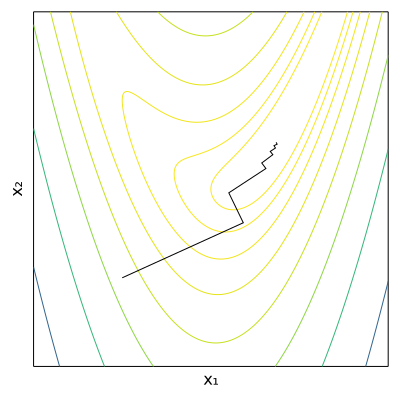

In [17]:
rosenplot()
plot!(gdxs[:,1], gdxs[:,2], color=:black)

# Conjugate Gradient

In [10]:
mutable struct ConjugateGradientDescent <: DescentMethod
    x 
    α
    d
    g
end

In [11]:
function step!(M::ConjugateGradientDescent, f, ∇f)
    d, g = M.d, M.g
    g′ = ∇f(M.x)
    β = max(0, dot(g′, g′-g)/(g⋅g)) # Polak-Ribière update
    d′ = -g′ + β*d
    M.α = strong_backtracking(f, ∇f, M.x, d′)
    M.x += M.α*d′
    M.d, M.g = d′, g′
end

step! (generic function with 2 methods)

In [18]:
CGD = ConjugateGradientDescent(x0, 0, -∇f(x0), ∇f(x0))
iter = 6
cgxs = copy(CGD.x)'

for i in 1:iter
    x_prev = CGD.x
    step!(CGD, f, ∇f)
    cgxs = [cgxs; (CGD.x)']
end

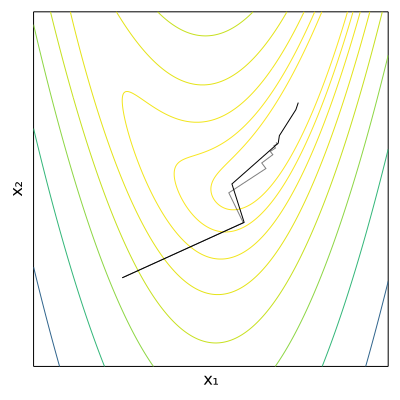

In [20]:
rosenplot()
plot!(gdxs[:,1], gdxs[:,2], alpha=0.5, color=:black)
plot!(cgxs[:,1], cgxs[:,2], color=:black)